<a href="https://colab.research.google.com/github/cbaldassari/gmm_init/blob/main/GMM_1_5_ninit_exp4_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install missingpy==0.2.0

In [ ]:
!pip install scikit-learn==0.22.1

In [ ]:
import missingpy
from missingpy import MissForest

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import mixture
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import skew 
from scipy.stats import kurtosis
from tqdm import tqdm

#toy

In [ ]:
#!pip install pandas==1.2.0

In [ ]:
!pip install xlrd==1.2.0

In [ ]:
stocha=[]
hubfilled=pd.DataFrame()
hubnames=["gas","oil","spx","pjm"]
stochastic2=pd.DataFrame()
stochastic3=pd.DataFrame()
stochastic4=pd.DataFrame()
logprezzi=pd.DataFrame()
trend=pd.DataFrame()
prezzi=pd.DataFrame()
flagin=True
chart=pd.DataFrame()
logprezzidepurati=pd.DataFrame()
r=pd.DataFrame()
x=pd.DataFrame()


for hub in hubnames:
  ####START

  huball=pd.read_excel("/content/drive/MyDrive/Mari/plotpaper2/MTF_share/"+hub+".xls",sheet_name="Data 1",parse_dates=["Trade date"])

  #huball.drop(["Price hub"],axis=1, inplace=True)
  huball.rename(columns={'Wtd avg price $/MWh':'Price',  'Trade date':'Date'},inplace=True)
  
  huballhub=huball.loc[huball['hub_transcode'] == hub]#FILTRO SU HUB NAME

  a=len(huballhub)
  huballhub.drop(["hub_transcode"],axis=1, inplace=True)

  huballhub=huballhub.groupby('Date').first()

  minrangedate=huballhub.index.min()
  maxrangedate=huballhub.index.max()

  check=pd.Series(pd.date_range(start = (minrangedate), end = maxrangedate, freq='D'))#.difference(huballhub.index))

  check.sort_index(ascending=True)
  cnt=0
 
  huballhub = huballhub.reindex(check, fill_value=np.NaN)

  huballhub.index.name = "Date"
  #huballhub["Price"].isnull().resample('Y').sum()#griglia

  idxs=np.arange(huballhub.shape[0])##

  toimpute=pd.DataFrame()
  toimpute["Date"]=idxs
  toimpute["Price"]=huballhub["Price"].values

  from missingpy import MissForest
  imputer = MissForest(random_state=1234)

  X_imputed = imputer.fit_transform(toimpute.to_numpy(),)
  
  huballhub["Price"]=X_imputed[:,1]
  df=huballhub
  
  #allineamento
  start = '01-01-2015'
  end = '31-12-2019'
  
  mask = (huballhub.index >= start) & (huballhub.index <= end)
  huballhub = huballhub.loc[mask]  
  hubfilled[hub]=huballhub["Price"]
  chart[hub]=hubfilled[hub]
  lowess = sm.nonparametric.lowess(np.log(hubfilled[hub]), hubfilled.index, frac=0.1)  
  stocha=np.log(hubfilled[hub])-lowess[:, 1]

  prezzi[hub]=hubfilled[hub]

  logprezzidepurati[hub]=np.log(hubfilled[hub])-lowess[:, 1]
  
  logprezzi[hub]=np.log(hubfilled[hub])
  
  if (flagin):
    trend=trend.reindex_like(prezzi)
    flagin=False

  trend[hub]=lowess[:, 1]

  stochastic3[hub]=hubfilled[hub]
  stochastic4[hub]=sm.nonparametric.lowess(hubfilled[hub], hubfilled.index, frac=0.1)[:, 1]
  stochastic2[hub]=stocha-stocha.shift(1)
  x[hub]=stocha
  r[hub]=stochastic2[hub]
stochastic2.dropna(inplace=True) 

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


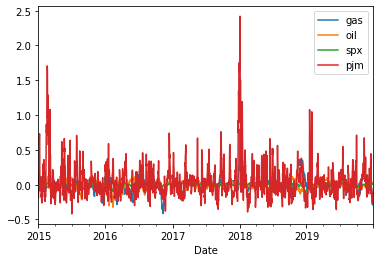

In [ ]:
 x.plot()

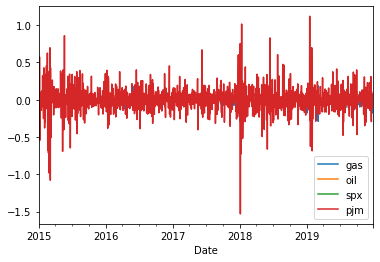

In [ ]:
r.plot()

In [ ]:
x

,gas,oil,spx,pjm
Date,,,,
2015-01-01,0.037910,0.135493,0.012431,-0.188155
2015-01-02,0.004669,0.123787,0.011611,-0.053207
2015-01-03,0.029062,0.107675,0.004342,-0.029948
2015-01-04,0.051363,0.073526,-0.004025,0.188671
2015-01-05,0.075145,0.068042,-0.007785,0.064009
...,...,...,...,...
2019-12-27,-0.291724,0.037227,0.011754,-0.216044
2019-12-28,-0.235856,0.035462,0.010123,-0.224470
2019-12-29,-0.167072,0.033414,0.006399,-0.213090


In [ ]:
r

,gas,oil,spx,pjm
Date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,-0.033241,-0.011706,-0.000820,0.134948
2015-01-03,0.024393,-0.016112,-0.007269,0.023259
2015-01-04,0.022301,-0.034150,-0.008367,0.218619
2015-01-05,0.023783,-0.005484,-0.003760,-0.124662
...,...,...,...,...
2019-12-27,-0.177148,-0.000254,-0.000787,0.053967
2019-12-28,0.055868,-0.001765,-0.001631,-0.008425
2019-12-29,0.068785,-0.002048,-0.003723,0.011380


In [ ]:
x.to_pickle("/content/drive/MyDrive/Mari/plotpaper2/x_logprezzidepurati.pk")

In [ ]:
r.to_pickle("/content/drive/MyDrive/Mari/plotpaper2/r_rendimenti.pk")

In [ ]:
logprezzidepurati.to_csv("/content/drive/MyDrive/Mari/toy/logprezzidepurati.csv")

In [ ]:
stochastic2.to_csv("/content/drive/MyDrive/Mari/toy/toy_time_series_preprocess.csv")

#preprocessing

In [ ]:
pjm=pd.read_csv("/content/drive/MyDrive/Mari/plotpaper2/MTF_share/pjm.csv", parse_dates=["Trade date"])
pjm.to_excel("/content/drive/MyDrive/Mari/plotpaper2/MTF_share/pjm.xls", sheet_name="Data 1")

In [ ]:
stocha=[]
hubfilled=pd.DataFrame()
hubnames=["gas","oil","spx","pjm"]
stochastic2=pd.DataFrame()
stochastic3=pd.DataFrame()
stochastic4=pd.DataFrame()
logprezzi=pd.DataFrame()
trend=pd.DataFrame()
prezzi=pd.DataFrame()
flagin=True
chart=pd.DataFrame()

for hub in hubnames:
  ####START

  huball=pd.read_excel("/content/drive/MyDrive/Mari/plotpaper2/MTF_share/"+hub+".xls",sheet_name="Data 1",parse_dates=["Trade date"])

  #huball.drop(["Price hub"],axis=1, inplace=True)
  huball.rename(columns={'Wtd avg price $/MWh':'Price',  'Trade date':'Date'},inplace=True)
  
  huballhub=huball.loc[huball['hub_transcode'] == hub]#FILTRO SU HUB NAME

  a=len(huballhub)
  huballhub.drop(["hub_transcode"],axis=1, inplace=True)

  huballhub=huballhub.groupby('Date').first()

  minrangedate=huballhub.index.min()
  maxrangedate=huballhub.index.max()

  check=pd.Series(pd.date_range(start = (minrangedate), end = maxrangedate, freq='D'))#.difference(huballhub.index))

  check.sort_index(ascending=True)
  cnt=0
 
  huballhub = huballhub.reindex(check, fill_value=np.NaN)

  huballhub.index.name = "Date"
  #huballhub["Price"].isnull().resample('Y').sum()#griglia

  idxs=np.arange(huballhub.shape[0])##

  toimpute=pd.DataFrame()
  toimpute["Date"]=idxs
  toimpute["Price"]=huballhub["Price"].values

  from missingpy import MissForest
  imputer = MissForest(random_state=1234)

  X_imputed = imputer.fit_transform(toimpute.to_numpy(),)
  
  huballhub["Price"]=X_imputed[:,1]
  df=huballhub
  
  #allineamento
  start = '01-01-2015'
  end = '31-12-2019'
  
  mask = (huballhub.index >= start) & (huballhub.index <= end)
  huballhub = huballhub.loc[mask]  
  hubfilled[hub]=huballhub["Price"]
  chart[hub]=hubfilled[hub]
  lowess = sm.nonparametric.lowess(np.log(hubfilled[hub]), hubfilled.index, frac=0.1)  
  stocha=np.log(hubfilled[hub])-lowess[:, 1]

  prezzi[hub]=hubfilled[hub]

  logprezzi[hub]=np.log(hubfilled[hub])
  
  if (flagin):
    trend=trend.reindex_like(prezzi)
    flagin=False

  trend[hub]=lowess[:, 1]

  stochastic3[hub]=hubfilled[hub]
  stochastic4[hub]=sm.nonparametric.lowess(hubfilled[hub], hubfilled.index, frac=0.1)[:, 1]

  stochastic2[hub]=stocha-stocha.shift(1)
stochastic2.dropna(inplace=True) 

ImportError: ignored

In [ ]:
trend

,gas,oil,spx,pjm
Date,,,,
2015-01-01,1.098287,3.839958,7.617659,3.786166
2015-01-02,1.097271,3.841208,7.617976,3.785145
2015-01-03,1.096258,3.842462,7.618293,3.784126
2015-01-04,1.095246,3.843719,7.618609,3.783107
2015-01-05,1.094236,3.844981,7.618925,3.782088
...,...,...,...,...
2019-12-27,0.851340,4.086029,8.071581,3.270517
2019-12-28,0.850934,4.086935,8.072403,3.268802
2019-12-29,0.850522,4.087845,8.073226,3.267077


In [ ]:
stochastic=stochastic2

In [ ]:
stochastic.head()
stochastic.to_csv('/content/drive/MyDrive/Mari/plotpaper2/GMMdata_live.csv',index=True,index_label="Date")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
stochastic4.head()

,gas,oil,spx,pjm
0,2.996023,46.363462,2033.662118,44.539730
1,2.993140,46.427216,2034.322679,44.489467
2,2.990263,46.491172,2034.981964,44.439223
3,2.987392,46.555333,2035.639943,44.389001
4,2.984528,46.619703,2036.296582,44.338804


In [ ]:
stochastic3["pjmt"]=stochastic4["pjm"].values

In [ ]:
stochastic3["gast"]=stochastic4["gas"].values
stochastic3["oilt"]=stochastic4["oil"].values
stochastic3["spxt"]=stochastic4["spx"].values

In [ ]:
stochastic3

,gas,oil,spx,pjm,pjmt,gast,oilt,spxt
Date,,,,,,,,
2015-01-01,3.1149,53.2741,2059.2352,36.5255,44.539730,2.996023,46.363462,2033.662118
2015-01-02,3.0100,52.7200,2058.2000,41.7600,44.489467,2.993140,46.427216,2034.322679
2015-01-03,3.0812,51.9425,2043.9415,42.6991,44.439223,2.990263,46.491172,2034.981964
2015-01-04,3.1475,50.2618,2027.5514,53.0788,44.389001,2.987392,46.555333,2035.639943
2015-01-05,3.2200,50.0500,2020.5800,46.8100,44.338804,2.984528,46.619703,2036.296582
...,...,...,...,...,...,...,...,...
2019-12-27,1.7500,61.7600,3240.0200,21.2100,26.635539,2.342025,59.522741,3200.584407
2019-12-28,1.8498,61.7070,3237.3996,20.9960,26.588139,2.340922,59.574894,3203.081981
2019-12-29,1.9807,61.6368,3228.0245,21.1997,26.540484,2.339803,59.627274,3205.582948


#prezzi

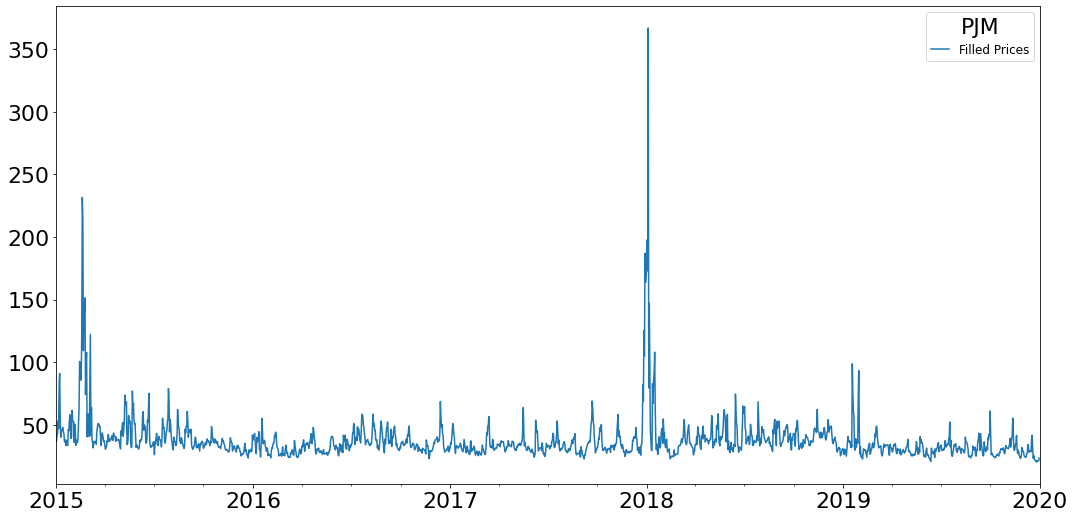

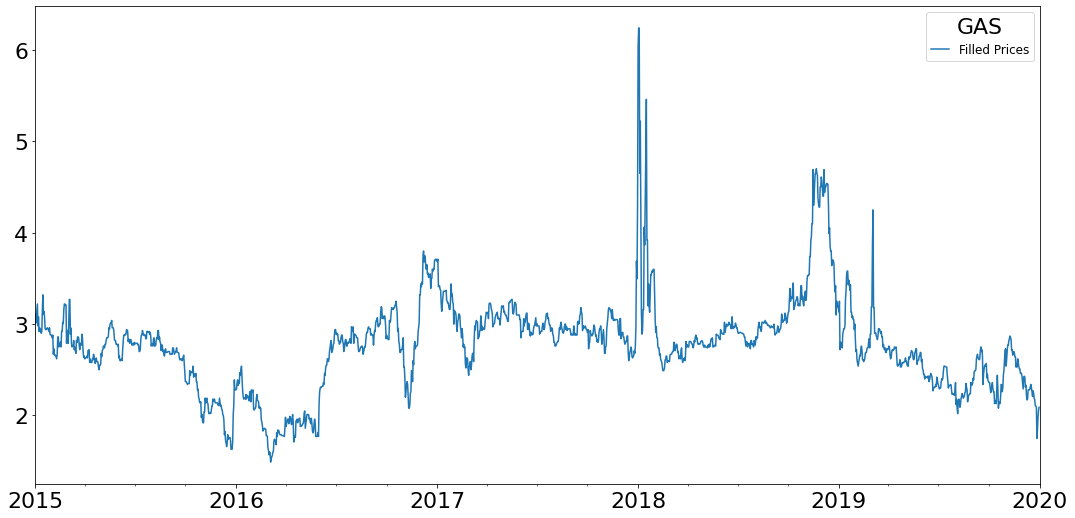

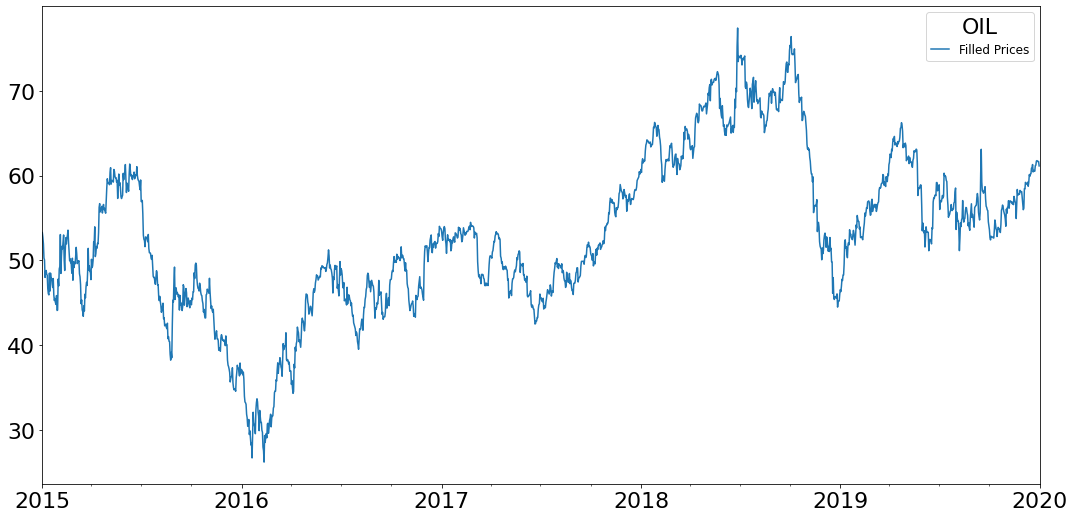

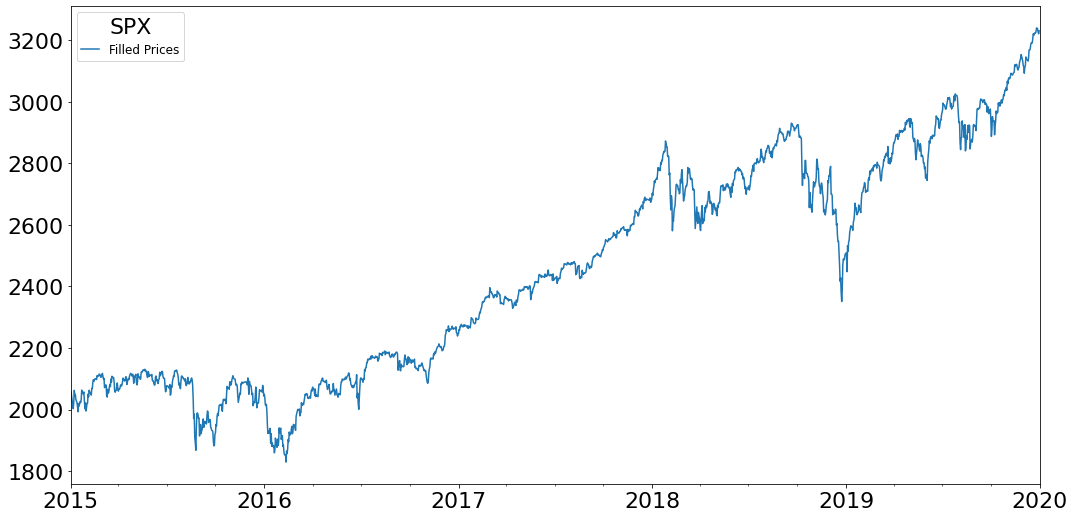

In [ ]:
import datetime 

ax =  prezzi["pjm"].plot(figsize=(15,8),legend="Raw prices")
#ax1 = stochastic3["pjmt"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Filled Prices","Trend"],loc='upper right',title = "PJM")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/prezziPJM.pdf')
plt.show()

ax =  prezzi["gas"].plot(figsize=(15,8),legend="Raw prices")
#ax1 = stochastic3["gast"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Filled Prices","Trend"],loc='upper right',title = "GAS")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/prezziGAS.pdf')
plt.show()

ax =  prezzi["oil"].plot(figsize=(15,8),legend="Raw prices")
#ax1 = stochastic3["oilt"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Filled Prices","Trend"],loc='upper right',title = "OIL")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/prezziOIL.pdf')
plt.show()

ax =  prezzi["spx"].plot(figsize=(15,8),legend="Raw prices")
#ax1 = stochastic3["spxt"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Filled Prices","Trend"],title = "SPX")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/prezziSPX.pdf')
plt.show()

#log (prezzi) - trend

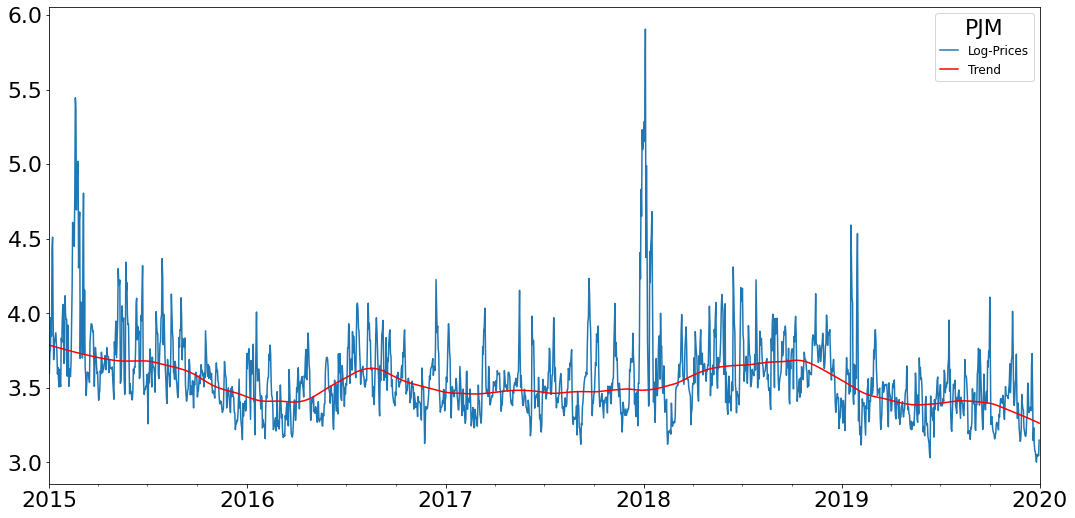

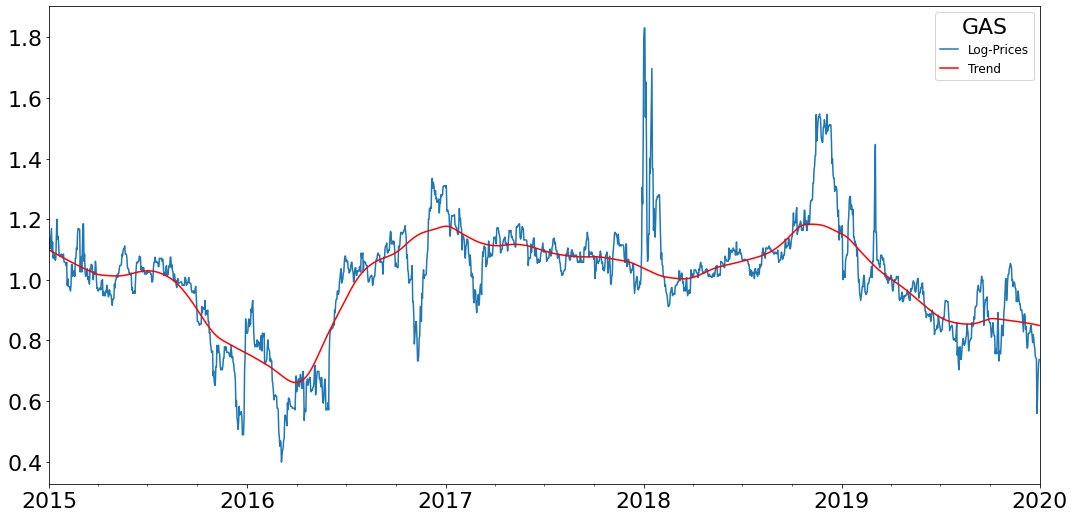

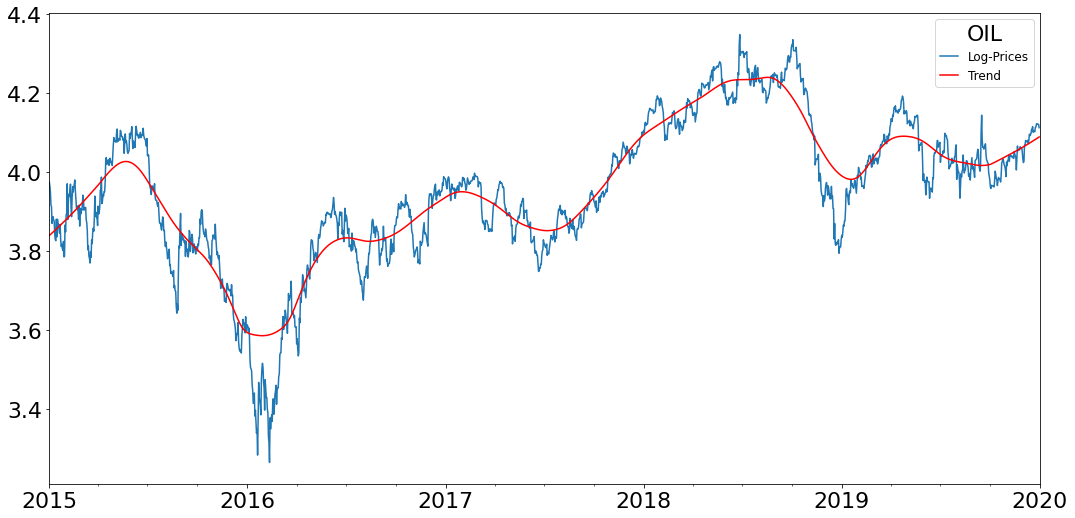

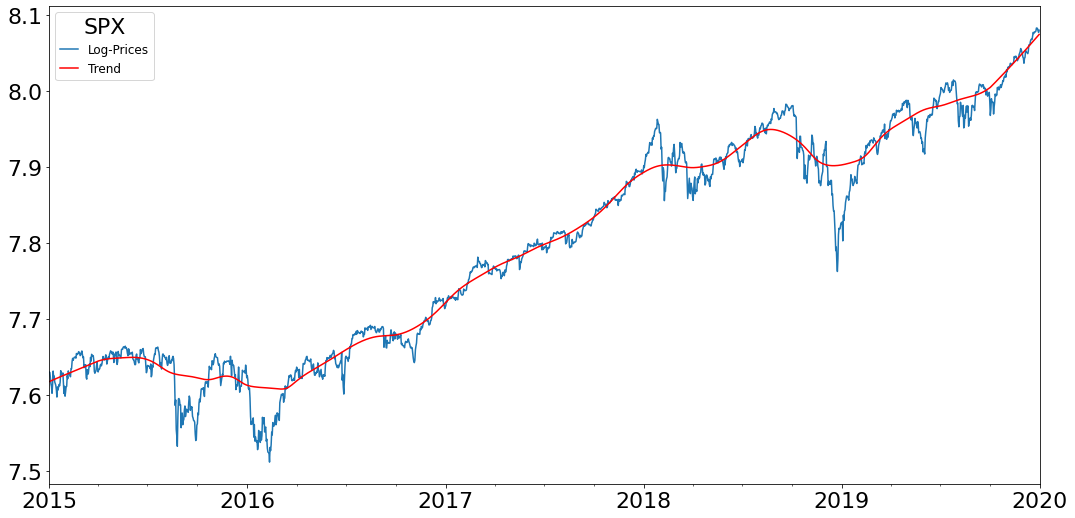

In [ ]:
import datetime 

ax =  logprezzi["pjm"].plot(figsize=(15,8),legend="Raw prices")
ax1 = trend["pjm"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Log-Prices","Trend"],loc='upper right',title = "PJM")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/logprezzi_trendPJM.pdf')
plt.show()

ax =  logprezzi["gas"].plot(figsize=(15,8),legend="Raw prices")
ax1 = trend["gas"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Log-Prices","Trend"],loc='upper right',title = "GAS")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/logprezzi_trendGAS.pdf')
plt.show()

ax =  logprezzi["oil"].plot(figsize=(15,8),legend="Raw prices")
ax1 = trend["oil"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Log-Prices","Trend"],loc='upper right',title = "OIL")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/logprezzi_trendOIL.pdf')
plt.show()

ax =  logprezzi["spx"].plot(figsize=(15,8),legend="Raw prices")
ax1 = trend["spx"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Log-Prices","Trend"],title = "SPX")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/logprezzi_trendSPX.pdf')
plt.show()

#log-prezzi

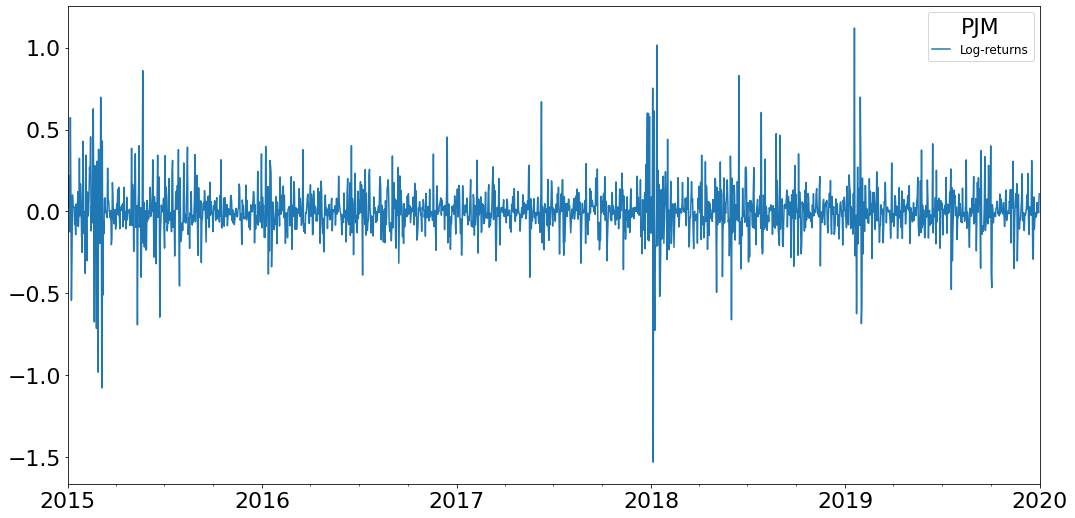

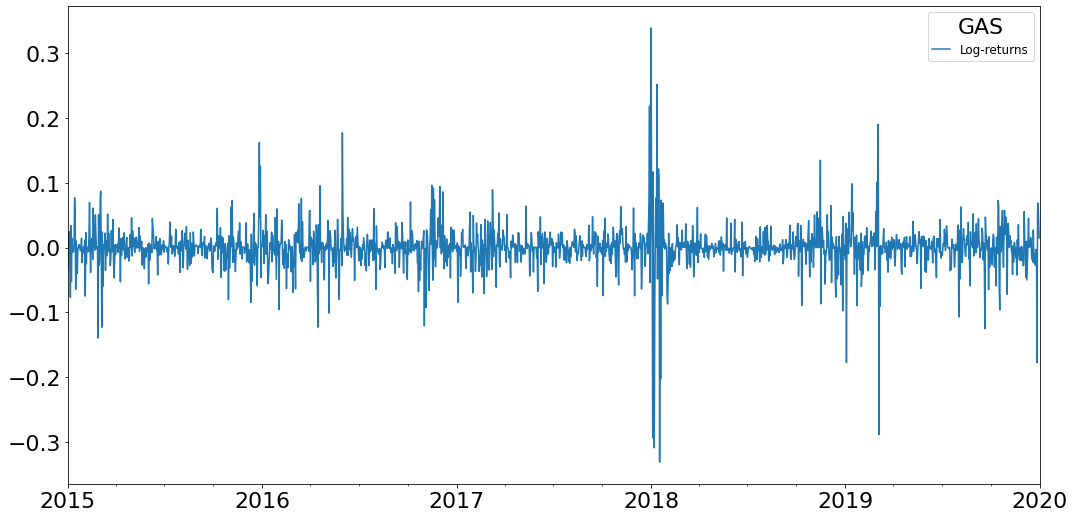

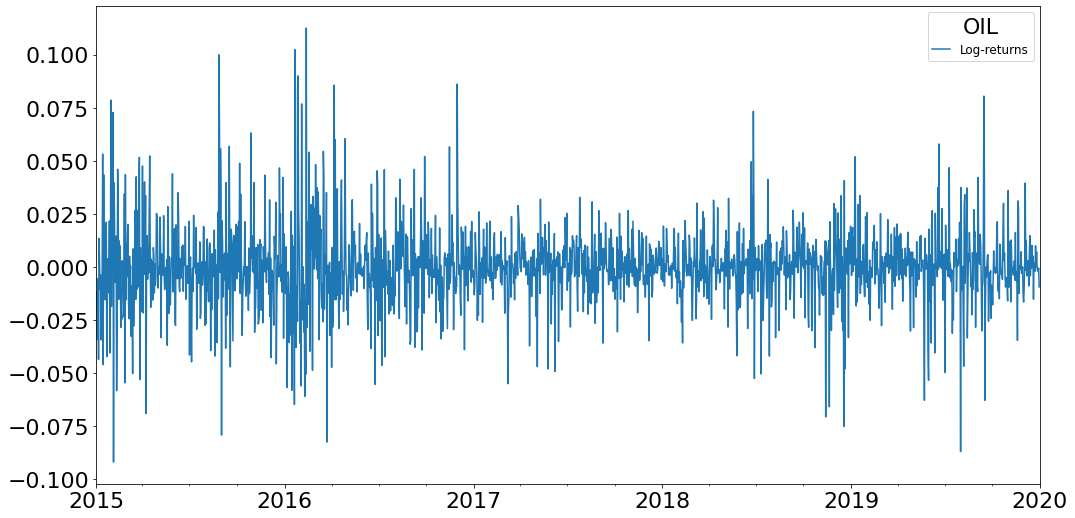

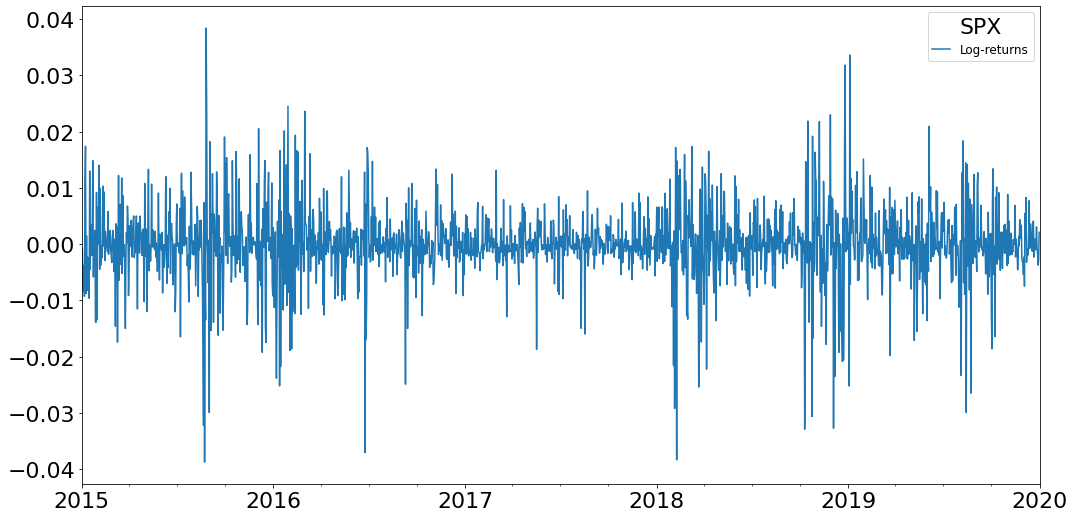

In [ ]:
import datetime 

ax =  stochastic["pjm"].plot(figsize=(15,8),legend="Raw prices")
#ax1 = trend["pjm"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Log-returns","Trend"],loc='upper right',title = "PJM")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/logretPJM.pdf')
plt.show()

ax =  stochastic["gas"].plot(figsize=(15,8),legend="Raw prices")
#ax1 = trend["gas"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Log-returns","Trend"],loc='upper right',title = "GAS")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/logretGAS.pdf')
plt.show()

ax =  stochastic["oil"].plot(figsize=(15,8),legend="Raw prices")
#ax1 = trend["oil"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Log-returns","Trend"],loc='upper right',title = "OIL")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/logretOIL.pdf')
plt.show()

ax =  stochastic["spx"].plot(figsize=(15,8),legend="Raw prices")
#ax1 = trend["spx"].plot(figsize=(15,8),c= "red",legend="Trend")
plt.rcParams.update({'font.size': 22,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
plt.legend(["Log-returns","Trend"],title = "SPX")
plt.tight_layout()
ax.xaxis.set_label_text("")
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2020, 1, 1)])

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/logretSPX.pdf')
plt.show()

#GRID SEARCH

In [ ]:
hubnames=["pjm","oil","gas","spx"]

for hub in hubnames:
  scaler = MinMaxScaler()
  X = scaler.fit_transform(stochastic2[hub].values.reshape(-1, 1))
  
  trial=1000
  size = len(X)
  n_components=np.arange(1,31) #1:100 components

  idxs=np.arange(len(n_components))
  grid=pd.DataFrame(columns=["idxs","avg1","std1","avg2","std2","avg3","std3","avg4","std4","aic","bic","comp",
                             "weightscomp_1","weightscomp_5","weightscomp_10","weights"])
  grid.set_index("idxs")
  
  for components in tqdm(n_components):
      bic=[]
      aic=[]
      
      weightscomp_1=[]
      weightscomp_5=[]
      weightscomp_10=[]
      
      res=pd.DataFrame(columns=["idx","first","second","third","fourth"])
      res["idx"]=idxs
      res.set_index("idx")

      gmm = mixture.GaussianMixture(n_components=components,n_init=1000, covariance_type='full', init_params="kmeans").fit(X)
      bic=gmm.bic(X)
      aic=gmm.aic(X) 
      weights=gmm.weights_

      for cnt in range(trial):

          weightscomp_1=len([1 for i in weights if i > 0.01])
          weightscomp_5=len([1 for i in weights if i > 0.05])
          weightscomp_10=len([1 for i in weights if i > 0.1])
 
          data_new = gmm.sample(size)
          sample=data_new[0].reshape(-1, 1) 
          
          descaled_sample=scaler.inverse_transform(sample)
          samplezero=descaled_sample

          item={"1":samplezero.mean(),
                "2":samplezero.std(),
                "3":skew(samplezero)[0],
                "4":kurtosis(samplezero)[0]+3
                }
          
          res.at[cnt,"first"]=item["1"]
          res.at[cnt,"second"]=item["2"]
          res.at[cnt,"third"]=item["3"]
          res.at[cnt,"fourth"]=item["4"]
      
      grid.at[components,'avg1']=res["first"].mean()
      grid.at[components,'std1']=res["first"].std()
      
      grid.at[components,'avg2']=res["second"].mean()
      grid.at[components,'std2']=res["second"].std()

      grid.at[components,'avg3']=res["third"].mean()
      grid.at[components,'std3']=res["third"].std()

      grid.at[components,'avg4']=res["fourth"].mean()
      grid.at[components,'std4']=res["fourth"].std() 

      #########################################

      grid.at[components,'bic']=np.asarray(bic)
      grid.at[components,'aic']=np.asarray(aic)
      grid.at[components,'weightscomp_1']=np.asarray(weightscomp_1)
      grid.at[components,'weightscomp_5']=np.asarray(weightscomp_5)
      grid.at[components,'weightscomp_10']=np.asarray(weightscomp_10)
      grid.at[components,'weights']=np.asarray(weights)
      grid.at[components,'comp']=components

  grid.to_csv("/content/drive/MyDrive/Mari/20210902_kmeans_GMM_"+hub+".csv")

#div


In [ ]:
pjm=pd.read_csv("/content/drive/MyDrive/Mari/20210902_kmeans_GMM_"+"pjm"""+".csv")

pjm.reset_index(drop=True, inplace=True)
pjm.set_index("Unnamed: 0", inplace=True)
ax = pjm["bic"].plot(figsize=(15,8),label="BIC curve")
ax1 = pjm["aic"].plot(figsize=(15,8),label="AIC curve")
plt.rcParams.update({'font.size': 18,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top
#

ax.xaxis.set_label_text("No. of components")
ax.legend(["bic","aic"],loc='upper right')

plt.xticks(np.arange(1,100),rotation=0)
plt.tight_layout()

ax.set_xlim([1,15])
ax.set_xticks(np.arange(0, 30+1, 2))

plt.plot(pjm.index[pjm['bic'] == pjm["bic"].min()].tolist()[0],pjm["bic"].min(), "s", c= "blue",label="BIC estim.",marker='o', alpha=.5,markersize=22)
plt.plot(pjm.index[pjm['aic'] == pjm["aic"].min()].tolist()[0],pjm["aic"].min(), "s",c= "orange",label="AIC estim.",marker='o', alpha=.5,markersize=22)

plt.plot(pjm.index[spx['comp'] == 7].tolist()[0],pjm["bic"][pjm['comp'] == 7].tolist()[0], "s", c= "red",label="SMM estim.", marker='X', alpha=.5,markersize=15)
plt.plot(pjm.index[spx['comp'] == 7].tolist()[0],pjm["aic"][pjm['comp'] == 7].tolist()[0], "s", c= "red",label="", marker='X', alpha=.5,markersize=15)
plt.legend(frameon=True, labelspacing=1, title='PJM',loc='upper right')


plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/bicaicPJMkm.pdf')  # saves the current figure
print(pjm["bic"].min())
print(pjm["aic"].min())

plt.show()

In [ ]:
pjm

In [ ]:
pjm.index[pjm['aic'] == pjm["aic"].min()].tolist()[0]

In [ ]:
gas=pd.read_csv("/content/drive/MyDrive/Mari/20210902_kmeans_GMM_"+"gas"""+".csv")

gas.reset_index(drop=True, inplace=True)
gas.set_index("Unnamed: 0", inplace=True)
ax = gas["bic"].plot(figsize=(15,8),label="BIC curve")
ax1 = gas["aic"].plot(figsize=(15,8),label="AIC curve")
plt.rcParams.update({'font.size': 18,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top

ax.xaxis.set_label_text("No. of components")
ax.legend(["bic","aic"])

plt.xticks(np.arange(1,100),rotation=0)
plt.tight_layout()
ax.set_xlim([1,30])
ax.set_xticks(np.arange(0, 30+1, 2))

#ax.set_ylim([-5885,-5050])
plt.plot(gas.index[gas['bic'] == gas["bic"].min()].tolist()[0],gas["bic"].min(), "s", c= "blue",label="BIC estim.",marker='o', alpha=.5,markersize=22)
plt.plot(gas.index[gas['aic'] == gas["aic"].min()].tolist()[0],gas["aic"].min(), "s", c= "orange",label="AIC estim.",marker='o', alpha=.5,markersize=22)

plt.plot(gas.index[spx['comp'] == 7].tolist()[0],gas["bic"][gas['comp'] == 7].tolist()[0], "s", c= "red",label="SMM estim.", marker='X', alpha=.5,markersize=15)
plt.plot(gas.index[spx['comp'] == 7].tolist()[0],gas["aic"][gas['comp'] == 7].tolist()[0], "s", c= "red",label="", marker='X', alpha=.5,markersize=15)
plt.legend(frameon=True, labelspacing=1, title='GAS',loc='upper right')

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/bicaicGASkm.pdf')  # saves the current figure
print(gas["bic"].min())
print(gas["aic"].min())
plt.show()

In [ ]:
gas

In [ ]:
oil=pd.read_csv("/content/drive/MyDrive/Mari/20210902_kmeans_GMM_"+"oil"""+".csv")

oil.reset_index(drop=True, inplace=True)
oil.set_index("Unnamed: 0", inplace=True)
ax = oil["bic"].plot(figsize=(15,8),label="BIC curve")
ax1 = oil["aic"].plot(figsize=(15,8),label="AIC curve")
plt.rcParams.update({'font.size': 18,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top

ax.xaxis.set_label_text("No. of components")
ax.legend(["bic","aic"])

plt.xticks(np.arange(1,100),rotation=0)
plt.tight_layout()
ax.set_xlim([1,30])
ax.set_xticks(np.arange(0, 30+1, 2))

#ax.set_ylim([-5885,-5050])
plt.plot(oil.index[oil['bic'] == oil["bic"].min()].tolist()[0],oil["bic"].min(), "s", c= "blue",label="BIC estim.",marker='o', alpha=.5,markersize=22)
plt.plot(oil.index[oil['aic'] == oil["aic"].min()].tolist()[0],oil["aic"].min(), "s", c= "orange",label="AIC estim.",marker='o', alpha=.5,markersize=22)

plt.plot(oil.index[spx['comp'] == 7].tolist()[0],oil["bic"][oil['comp'] == 7].tolist()[0], "s", c= "red",label="SMM estim.", marker='X', alpha=.5,markersize=15)
plt.plot(oil.index[spx['comp'] == 7].tolist()[0],oil["aic"][oil['comp'] == 7].tolist()[0], "s", c= "red",label="", marker='X', alpha=.5,markersize=15)
plt.legend(frameon=True, labelspacing=1, title='OIL',loc='upper right')

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/bicaicOILkm.pdf')  # saves the current figure
print(oil["bic"].min())
print(oil["aic"].min())
plt.show()

In [ ]:
oil

In [ ]:
spx=pd.read_csv("/content/drive/MyDrive/Mari/20210902_kmeans_GMM_"+"spx"""+".csv")

spx.reset_index(drop=True, inplace=True)
spx.set_index("Unnamed: 0", inplace=True)
ax = spx["bic"].plot(figsize=(15,8),label="BIC curve")
ax1 = spx["aic"].plot(figsize=(15,8),label="AIC curve")
plt.rcParams.update({'font.size': 18,'legend.fontsize': 12,'legend.handlelength': 1.5}) # must set in top

ax.xaxis.set_label_text("No. of components")
#ax.legend(["BIC","AIC"])

plt.xticks(np.arange(1,100),rotation=0)
plt.tight_layout()
ax.set_xlim([1,30])
#ax.set_ylim([-5885,-5050])
ax.set_xticks(np.arange(0, 30+1, 2))

plt.plot(spx.index[spx['bic'] == spx["bic"].min()].tolist()[0],spx["bic"].min(), "s", c= "blue",label="BIC estim.",marker='o', alpha=.5,markersize=22)
plt.plot(spx.index[spx['aic'] == spx["aic"].min()].tolist()[0],spx["aic"].min(), "s", c= "orange",label="AIC estim.",marker='o', alpha=.5,markersize=22)

plt.plot(spx.index[spx['comp'] == 7].tolist()[0],spx["bic"][spx['comp'] == 7].tolist()[0], "s", c= "red",label="SMM estim.", marker='X', alpha=.5,markersize=15)
plt.plot(spx.index[spx['comp'] == 7].tolist()[0],spx["aic"][spx['comp'] == 7].tolist()[0], "s", c= "red",label="", marker='X', alpha=.5,markersize=15)

plt.legend(frameon=True, labelspacing=1, title='SPX',loc='upper right')

plt.savefig('/content/drive/MyDrive/Mari/plotpaper2/bicaicSPXkm.pdf')  # saves the current figure
print(spx["bic"].min())
print(spx["aic"].min())
plt.show()


In [ ]:
spx

#Valutazione dei risultati della griglia

In [ ]:
df=pd.DataFrame()

In [ ]:
hubnames=["spx"]#"std2","std3","std4"
df=pd.DataFrame(columns=["hub","frac","comp","bic","aic","weights"])

for hub in hubnames:
  grid2=pd.read_csv("/content/drive/MyDrive/Mari/20210902_kmeans_GMM_"+hub+".csv")

  itemorig={"1":stochastic[hub].mean(),
        "2":stochastic[hub].std(),
        "3":skew(stochastic[hub]),
        "4":kurtosis(stochastic[hub])+3
  }

  fractions=np.arange(2,50)

  for fraction in fractions:
    for index, row in grid2.iterrows():
      if (  (abs(row["avg2"]-itemorig["2"])< (row["std2"])/fraction) and  
            (abs(row["avg3"]-itemorig["3"])< (row["std3"])/fraction) and  
            (abs(row["avg4"]-itemorig["4"])< (row["std4"])/fraction)
          ):  
          dictionary={"hub":hub,"frac":fraction,
                      "comp":index+1,
                      "bic":row["bic"],
                      "aic":row["aic"],
                      "weights":row["weights"]}
          df = df.append(dictionary, ignore_index=True)

In [ ]:
grid2

In [ ]:
df[df["comp"]==df["comp"].min()]

In [ ]:
hub="gas"
c=25
grid2=pd.read_csv("/content/drive/MyDrive/Mari/20210902_kmeans_GMM_"+hub+".csv")

w=grid2["weights"][grid2["comp"]==c].to_list()[0]
w=w[1:-1]
w=w.split()
w.sort(reverse=False)

l_sf_f = [round(float(s),3) for s in w]
l_sf_f.sort(reverse=True)
cstr=''
for it in l_sf_f:
  cstr+=" "+str(it)
cstr

In [ ]:
-4450.763293	-4340.576587

In [ ]:
hub="spx"
comp=7
data=pd.read_csv("/content/drive/MyDrive/Mari/20210902_kmeans_GMM_"+hub+".csv")
itemorig={"1":stochastic[hub].mean(),
      "2":stochastic[hub].std(),
      "3":skew(stochastic[hub]),
      "4":kurtosis(stochastic[hub])+3
}

print("&"+str(data.loc[comp,"avg2"]-itemorig["2"])+"& "+str(data.loc[comp,"avg3"]-itemorig["3"])+"& "+str(data.loc[comp,"avg4"]-itemorig["4"]))

In [ ]:
data.loc[3,"avg2"]

In [ ]:
data